#Fourier Series
-----------------------------

f(x) = (a₀/2) + Σ(aₙ * cos(nπx/L) + bₙ * sin(nπx/L))

where the coefficients a₀, aₙ, and bₙ are given by:

a₀ = (1/L) * integral(from -L to L) f(x) dx

aₙ = (1/L) * integral(from -L to L) f(x) * cos(nπx/L) dx

bₙ = (1/L) * integral(from -L to L) f(x) * sin(nπx/L) dx

In [2]:
import numpy as np
import matplotlib.pyplot as plt


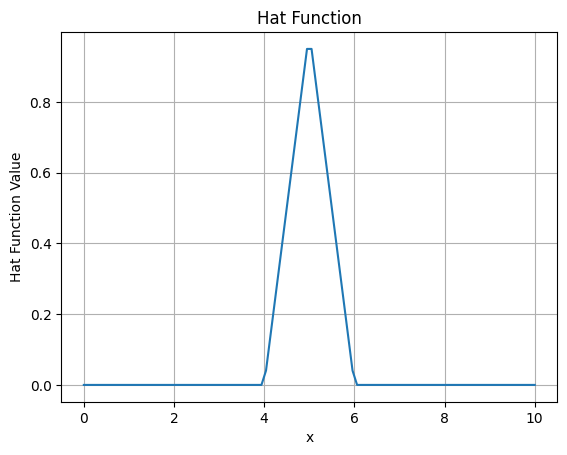

In [3]:
import numpy as np

def hat_function(x, center, width):
    """
    Generate a hat function.
    
    Parameters:
        x (float or array-like): Input value(s) at which to evaluate the function.
        center (float): Center of the hat function.
        width (float): Width of the hat function.
    
    Returns:
        float or array-like: The value(s) of the hat function at the given input(s).
    """
    half_width = width / 2
    return np.maximum(0, 1 - np.abs(x - center) / half_width)

# Example usage:
x_values = np.linspace(0, 10, 100)
y_values = hat_function(x_values, center=5, width=2)

import matplotlib.pyplot as plt

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('Hat Function Value')
plt.title('Hat Function')
plt.grid(True)
plt.show()


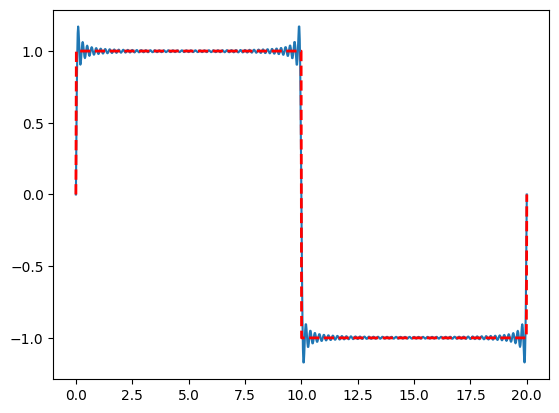

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, L):
    if 0 < x < L:
        return 1
    elif L/2 <= x < 2 * L:
        return -1
    else:
        return 0  # Adding this line to handle cases outside the specified ranges

L = 10
N = 1000  # Number of points for approximation
xp = np.linspace(0, 2*L, N)
dx = 2*L / N



A0 = np.sum([f(x, L) for x in xp]) * dx

fig, ax = plt.subplots()

pt=100

A = np.zeros(pt)
B = np.zeros(pt)

for k in range(pt):
    A[k] = 1 / L * np.sum([f(x, L) * np.cos((k + 1) * np.pi * x / L) for x in xp]) * dx
    B[k] = 1 / L * np.sum([f(x, L) * np.sin((k + 1) * np.pi * x / L) for x in xp]) * dx
    fourier_series = A0 / 2 + sum(A[k] * np.cos((k + 1) * np.pi * xp / L) + B[k] * np.sin((k + 1) * np.pi * xp / L) for k in range(pt))
    #ax.plot(xp, fourier_series, label=f"Fourier Series k={k+1}")
ax.plot(xp, fourier_series, label=f"Fourier Series k={k+1}")

ax.plot(xp, [f(x, L) for x in xp], label="Original Function",lw='2',ls='--',color='red')
#plt.legend()
plt.show()


In [ ]:
#Plot amplitudes 


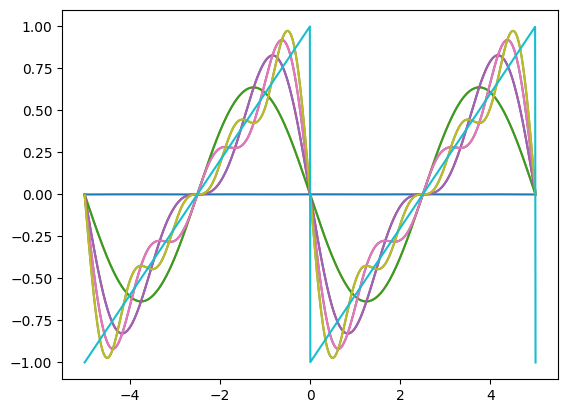

In [53]:
from scipy.integrate import simps
from scipy.signal import sawtooth
L=5
period=5
xp=np.linspace(-L,L,1000)
swatooth_fn=lambda xp :sawtooth(2*np.pi*xp/period,width=1.0)
#plt.plot(x,swatooth_fn(xp))

a0=1/L*simps(swatooth_fn(xp),xp)
an=lambda n : 1/L*simps(swatooth_fn(xp)*np.cos(n*np.pi*xp/L),xp)
bn=lambda n : 1/L*simps(swatooth_fn(xp)*np.sin(n*np.pi*xp/L),xp)

fig, ax = plt.subplots()
itr=10
for n in range(1,itr):
    s= a0/2 + sum([an(i)*np.cos(i*np.pi*xp)/L + bn(i)*np.sin(i*np.pi*xp/L) for i in range (1,n+1)])
    ax.plot(xp,s)

ax.plot(xp,swatooth_fn(xp))
plt.show()


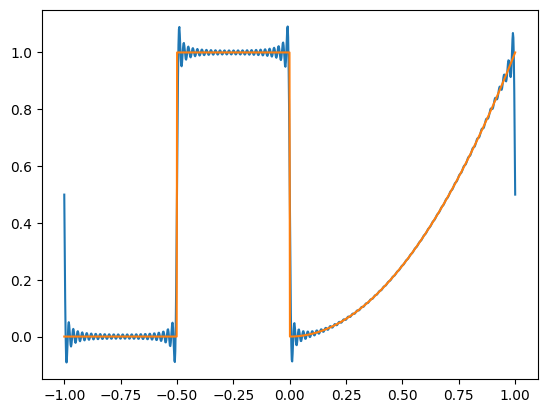

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

L=1  
x=np.linspace(-L,L,1000)
F=lambda x: np.array([0 if -L<= i<-0.5 else 1 if -0.5<=i<0 else i**2 for i in x  ])

a0=1/L*simps(F(x),x)
an=lambda n :1/L*simps(F(x)*np.cos(n*np.pi*x/L),x)
bn=lambda n: 1/L*simps(F(x)*np.sin(n*np.pi*x/L),x)
itr=100
fig, ax = plt.subplots()
for n in range(1,itr+1):
    s= a0/2 + sum([an(i)*np.cos(i*np.pi*x/L) + bn(i)*np.sin(i*np.pi*x/L) for i in range (1,n+1)])
ax.plot(x,s)

ax.plot(x,F(x))